In [31]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import re
import numpy as np
#import libraryies
#there are problems in some csvs, 1. some characters at the end of line 2. bending2/dataset4 revised

In [32]:
filelist = ["./AReM/bending1/dataset","./AReM/bending2/dataset","./AReM/cycling/dataset","./AReM/lying/dataset",
            "./AReM/sitting/dataset","./AReM/standing/dataset","./AReM/walking/dataset"]
Columnset=["# Columns: time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
#my dictionary


In [33]:
def readtest(filelist):#this function get test data
    mylist = []
    for a in filelist:
        if re.search("./AReM/bending1", a):
            for i in range(1,8):
                filestr = a+str(i)+".csv"
                datatmp = pd.read_csv(filestr, header = 4)
                mylist.append(datatmp)
        elif re.search("./AReM/bending2", a):
            for i in range(1,7):
                filestr = a+str(i)+".csv"
                datatmp = pd.read_csv(filestr, header = 4)
                mylist.append(datatmp)
        else:
            for i in range(1,4):
                filestr = a+str(i)+".csv"
                datatmp = pd.read_csv(filestr, header = 4)
                mylist.append(datatmp)    
    return mylist
def readtrain(filelist):#this function get train data
    mydata = pd.DataFrame(columns = Columnset)
    for a in filelist[2:]:
        for val in range(4,16):
            filestr = a+str(val)+".csv"
            datatmp = pd.read_csv(filestr, header = 4)
            mydata = mydata.append(datatmp)
    return mydata
dtest = readtest(filelist)
testdata = pd.concat(dtest)
traindata = readtrain(filelist)

In [34]:
def get_feature(filelist): #this function may get all the feature from every column of all the data and save them into Features_records.csv
    wr = open("Features_records.csv", "w")
    wcsv = csv.writer(wr)
    wcsv.writerow(["dataset", "mean", "max", "min","median", "SD"])
    for a in filelist:
        if re.search("./AReM/bending1", a):
            for i in range(1,8):
                filestr = a+str(i)+".csv"
                print("file "+filestr+" loaded")
                data = pd.read_csv(filestr, header = 4)            
                for vals in Columnset[1:]:
                    tmp = data[vals]
                    writelist=[a+str(i)+vals, tmp.mean(), tmp.max(), tmp.min(), tmp.median(), tmp.std()]
                    wcsv.writerow(writelist)
        elif re.search("./AReM/bending2", a):
            for i in range(1,7):
                filestr = a+str(i)+".csv"
                print("file "+filestr+" loaded")
                data = pd.read_csv(filestr, header = 4)
                for vals in Columnset[1:]:
                    tmp = data[vals]
                    writelist=[a+str(i)+vals, tmp.mean(), tmp.max(), tmp.min(), tmp.median(), tmp.std()]
                    wcsv.writerow(writelist)
        else:
            for i in range(1,16):

                filestr = a+str(i)+".csv"
                print("file "+filestr+" loaded")
                data = pd.read_csv(filestr, header = 4)
                for vals in Columnset[1:]:
                    tmp = data[vals]
                    writelist=[a+str(i)+vals, tmp.mean(), tmp.max(), tmp.min(), tmp.median(), tmp.std()]
                    wcsv.writerow(writelist)    
    wr.close()
get_feature(filelist)

file ./AReM/bending1/dataset1.csv loaded
file ./AReM/bending1/dataset2.csv loaded
file ./AReM/bending1/dataset3.csv loaded
file ./AReM/bending1/dataset4.csv loaded
file ./AReM/bending1/dataset5.csv loaded
file ./AReM/bending1/dataset6.csv loaded
file ./AReM/bending1/dataset7.csv loaded
file ./AReM/bending2/dataset1.csv loaded
file ./AReM/bending2/dataset2.csv loaded
file ./AReM/bending2/dataset3.csv loaded
file ./AReM/bending2/dataset4.csv loaded
file ./AReM/bending2/dataset5.csv loaded
file ./AReM/bending2/dataset6.csv loaded
file ./AReM/cycling/dataset1.csv loaded
file ./AReM/cycling/dataset2.csv loaded
file ./AReM/cycling/dataset3.csv loaded
file ./AReM/cycling/dataset4.csv loaded
file ./AReM/cycling/dataset5.csv loaded
file ./AReM/cycling/dataset6.csv loaded
file ./AReM/cycling/dataset7.csv loaded
file ./AReM/cycling/dataset8.csv loaded
file ./AReM/cycling/dataset9.csv loaded
file ./AReM/cycling/dataset10.csv loaded
file ./AReM/cycling/dataset11.csv loaded
file ./AReM/cycling/datas

In [35]:
newdata = pd.read_csv("Features_records.csv")

In [36]:
#1c3 Bootstrap
from sklearn.utils import resample
from scipy import stats
#This function do the bootstrap for the standard deviation's confidence interval for every feature, the number of iteration is 500 and the dataset size for every iteration is 100
def bootstrap(data):
    for vals in data.columns[1:]:
        print("The confidence interval for", vals,"is:")
        tmp = []
        for i in range(0,500):           
            datasets= resample(data[vals], n_samples = 100)
            tmp.append(datasets.std())
        m,v,s = stats.bayes_mvs(tmp, alpha=0.95)
        tmpseries = pd.Series(tmp)
#         print(tmpseries.mean())
        print(m)
bootstrap(newdata)

The confidence interval for mean is:
Mean(statistic=13.814707360923631, minmax=(13.722097864762862, 13.9073168570844))
The confidence interval for max is:
Mean(statistic=14.862687279770013, minmax=(14.784893237784193, 14.940481321755833))
The confidence interval for min is:
Mean(statistic=11.321460864514167, minmax=(11.211414057100495, 11.431507671927839))
The confidence interval for median is:
Mean(statistic=13.991286536718249, minmax=(13.905052457593984, 14.077520615842515))
The confidence interval for SD is:
Mean(statistic=1.5451637629204293, minmax=(1.5352724783830998, 1.5550550474577589))


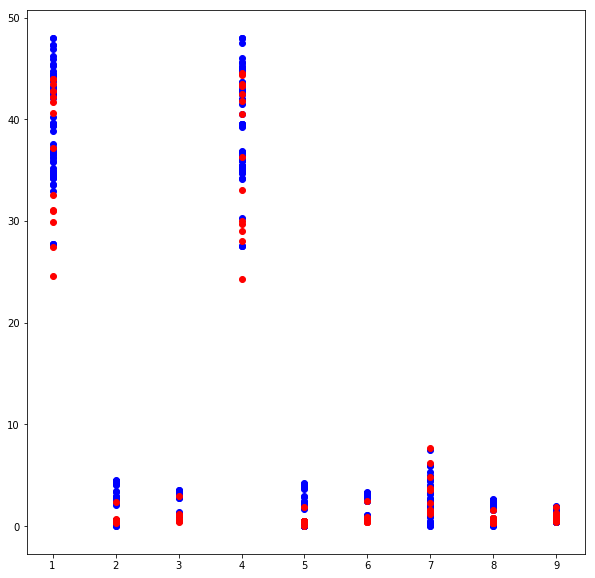

In [37]:
import matplotlib.pyplot as plt
import matplotlib as mp
#1di, get bend data and other data for plotting, feature chosen: mean, median, standard deviation
tmp = pd.DataFrame({"mean":[], "median":[], "SD":[]})
def bendindex():
    b1list = []
    b2list = []
    b6list = []
    for u in range(0,14):
        b1list.append(6*u)
        b2list.append(6*u+1)
        b6list.append(6*u+5)
    return b1list, b2list, b6list
b1list, b2list, b6list= bendindex()
# print(b1list, b2list, b6list)
def otherindex():
    o1list = []
    o2list = []
    o6list = []
    for u in range(0,75):
        o1list.append(6*u+78)
        o2list.append(6*u+79)
        o6list.append(6*u+83)
    return o1list, o2list, o6list
o1list, o2list, o6list= otherindex()
# print(o1list, o2list, o6list)
def benddata(b1list,b2list,b6list):
    v = newdata[["mean", "median", "SD"]]
    b1 = tmp
    b2 = tmp
    b6 = tmp
    for val in b1list:
        b1 = b1.append(v.loc[val])
    b1["series"] = 1
    for val in b2list:
        b2 = b2.append(v.loc[val])
    b2["series"] = 2
    for val in b6list:
        b6 = b6.append(v.loc[val])
    b6["series"] = 6
    return b1,b2,b6
b1, b2, b6 = benddata(b1list, b2list, b6list)
def otherdata(o1list,o2list,o6list):
    v = newdata[["mean", "median", "SD"]]
    o1 = tmp
    o2 = tmp
    o6 = tmp
    for val in o1list:
        o1 = o1.append(v.loc[val])
    o1["series"] = 1
    for val in o2list:
        o2 = o2.append(v.loc[val])
    o2["series"] = 2
    for val in o6list:
        o6 = o6.append(v.loc[val])
    o6["series"] = 6
    return o1,o2,o6
o1, o2, o6 = otherdata(o1list, o2list, o6list)
bgd={1:[], 2:[], 3:[],4:[], 5:[], 6:[],7:[],
                       8:[], 9:[]}
bgd[1]=b1["mean"].values.tolist()
bgd[2]=b2["mean"].values.tolist()
bgd[3]=b6["mean"].values.tolist()
bgd[4]=b1["median"].values.tolist()
bgd[5]=b2["median"].values.tolist()
bgd[6]=b6["median"].values.tolist()
bgd[7]=b1["SD"].values.tolist()
bgd[8]=b2["SD"].values.tolist()
bgd[9]=b6["SD"].values.tolist()
bdt = pd.DataFrame(data = bgd)

ogd={1:[], 2:[], 3:[],4:[], 5:[], 6:[],7:[],
                       8:[], 9:[]}
ogd[1]=o1["mean"].values.tolist()
ogd[2]=o2["mean"].values.tolist()
ogd[3]=o6["mean"].values.tolist()
ogd[4]=o1["median"].values.tolist()
ogd[5]=o2["median"].values.tolist()
ogd[6]=o6["median"].values.tolist()
ogd[7]=o1["SD"].values.tolist()
ogd[8]=o2["SD"].values.tolist()
ogd[9]=o6["SD"].values.tolist()
odt = pd.DataFrame(data = ogd)
plt.figure(figsize = (10,10))
for val in bdt.columns:
    tmp1=[]
    tmp2=[]
    for i in range(0,len(odt)):
        tmp1.append(val)
    plt.scatter(tmp1, odt[val], c= 'b')
    for i in range(0,len(bdt)):
        tmp2.append(val)
    plt.scatter(tmp2, bdt[val], c= 'r')
plt.savefig("d1_png")
plt.show()

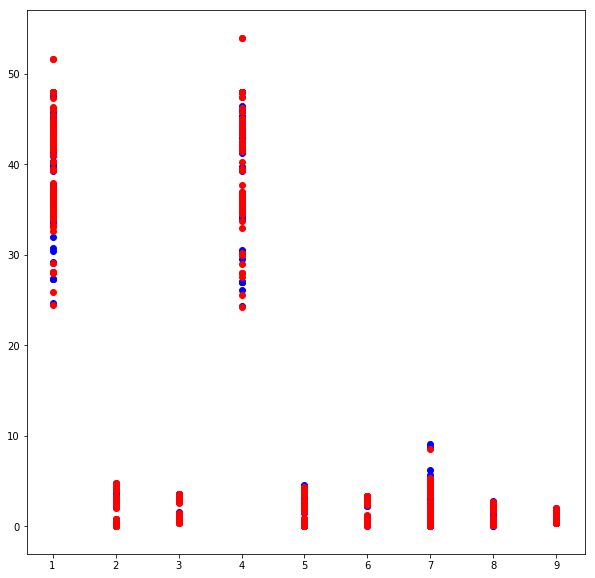

In [38]:
#this give the plot of dii, the equal split
def equalsplit():
    pgd={1:[], 2:[], 3:[],4:[], 5:[], 6:[],7:[],
                       8:[], 9:[]}
    qgd={1:[], 2:[], 3:[],4:[], 5:[], 6:[],7:[],
                       8:[], 9:[]}
    for a in filelist[:1]:
        for f in range(1,8):
            filestr = a+str(f)+".csv"
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, 2)
            pgd[1].append(mylist[0][mylist[0].columns[1]].mean())
            pgd[2].append(mylist[0][mylist[0].columns[2]].mean())
            pgd[3].append(mylist[0][mylist[0].columns[6]].mean())
            pgd[4].append(mylist[0][mylist[0].columns[1]].median())
            pgd[5].append(mylist[0][mylist[0].columns[2]].median())
            pgd[6].append(mylist[0][mylist[0].columns[6]].median())
            pgd[7].append(mylist[0][mylist[0].columns[1]].std())
            pgd[8].append(mylist[0][mylist[0].columns[2]].std())
            pgd[9].append(mylist[0][mylist[0].columns[6]].std())

            qgd[1].append(mylist[1][mylist[1].columns[1]].mean())
            qgd[2].append(mylist[1][mylist[1].columns[2]].mean())
            qgd[3].append(mylist[1][mylist[1].columns[6]].mean())
            qgd[4].append(mylist[1][mylist[1].columns[1]].median())
            qgd[5].append(mylist[1][mylist[1].columns[2]].median())
            qgd[6].append(mylist[1][mylist[1].columns[6]].median())
            qgd[7].append(mylist[1][mylist[1].columns[1]].std())
            qgd[8].append(mylist[1][mylist[1].columns[2]].std())
            qgd[9].append(mylist[1][mylist[1].columns[6]].std())
        
    for a in filelist[1:2]:
        for f in range(1,7):
            filestr = a+str(f)+".csv"
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, 2)
            pgd[1].append(mylist[0][mylist[0].columns[1]].mean())
            pgd[2].append(mylist[0][mylist[0].columns[2]].mean())
            pgd[3].append(mylist[0][mylist[0].columns[6]].mean())
            pgd[4].append(mylist[0][mylist[0].columns[1]].median())
            pgd[5].append(mylist[0][mylist[0].columns[2]].median())
            pgd[6].append(mylist[0][mylist[0].columns[6]].median())
            pgd[7].append(mylist[0][mylist[0].columns[1]].std())
            pgd[8].append(mylist[0][mylist[0].columns[2]].std())
            pgd[9].append(mylist[0][mylist[0].columns[6]].std())

            qgd[1].append(mylist[1][mylist[1].columns[1]].mean())
            qgd[2].append(mylist[1][mylist[1].columns[2]].mean())
            qgd[3].append(mylist[1][mylist[1].columns[6]].mean())
            qgd[4].append(mylist[1][mylist[1].columns[1]].median())
            qgd[5].append(mylist[1][mylist[1].columns[2]].median())
            qgd[6].append(mylist[1][mylist[1].columns[6]].median())
            qgd[7].append(mylist[1][mylist[1].columns[1]].std())
            qgd[8].append(mylist[1][mylist[1].columns[2]].std())
            qgd[9].append(mylist[1][mylist[1].columns[6]].std())
    for a in filelist[2:]:
        for f in range(1,16):
            filestr = a+str(f)+".csv"
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, 2)
            pgd[1].append(mylist[0][mylist[0].columns[1]].mean())
            pgd[2].append(mylist[0][mylist[0].columns[2]].mean())
            pgd[3].append(mylist[0][mylist[0].columns[6]].mean())
            pgd[4].append(mylist[0][mylist[0].columns[1]].median())
            pgd[5].append(mylist[0][mylist[0].columns[2]].median())
            pgd[6].append(mylist[0][mylist[0].columns[6]].median())
            pgd[7].append(mylist[0][mylist[0].columns[1]].std())
            pgd[8].append(mylist[0][mylist[0].columns[2]].std())
            pgd[9].append(mylist[0][mylist[0].columns[6]].std())

            qgd[1].append(mylist[1][mylist[1].columns[1]].mean())
            qgd[2].append(mylist[1][mylist[1].columns[2]].mean())
            qgd[3].append(mylist[1][mylist[1].columns[6]].mean())
            qgd[4].append(mylist[1][mylist[1].columns[1]].median())
            qgd[5].append(mylist[1][mylist[1].columns[2]].median())
            qgd[6].append(mylist[1][mylist[1].columns[6]].median())
            qgd[7].append(mylist[1][mylist[1].columns[1]].std())
            qgd[8].append(mylist[1][mylist[1].columns[2]].std())
            qgd[9].append(mylist[1][mylist[1].columns[6]].std())
#                 X["bend"]=0
    return pgd, qgd
p, q = equalsplit()
pdt = pd.DataFrame(data = p)
qdt =pd.DataFrame(data =  q)
plt.figure(figsize = (10,10))
for val in bdt.columns:
    tmp1=[]
    tmp2=[]
    for i in range(0,len(pdt)):
        tmp1.append(val)
    plt.scatter(tmp1, pdt[val], c= 'b')
    for i in range(0,len(qdt)):
        tmp2.append(val)
    plt.scatter(tmp2, qdt[val], c= 'r')
plt.savefig("d2_png")
plt.show()

In [39]:
from sklearn.linear_model import LogisticRegression
import numpy as np
# these functions generate test set data and train set data, given a value of split
def generatetrain(p):
    l = []
    for val in Columnset[1:]:
        l.append(val+"_mean")
        l.append(val+"_median")
        l.append(val+"_SD")
    l.append("bend")
    X = pd.DataFrame(columns = l)
    for a in filelist[:1]:
        for f in range(3,8):
            filestr = a+str(f)+".csv"
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, p)
            for b in mylist:
                m = []
                for val in Columnset[1:]:
                    m.append(b[val].mean())
                    m.append(b[val].median())
                    m.append(b[val].std())
                m.append(1.0)
                tmp = pd.DataFrame([m],columns=l)
                X=X.append(tmp)
        
    for a in filelist[1:2]:
        for f in range(3,7):
            filestr = a+str(f)+".csv"
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, p)
            for b in mylist:
                m = []
                for val in Columnset[1:]:
                    m.append(b[val].mean())
                    m.append(b[val].median())
                    m.append(b[val].std())
                m.append(1.0)
                tmp = pd.DataFrame([m],columns=l)
                X=X.append(tmp)   
    for a in filelist[2:]:
        for f in range(4,16):
            filestr = a+str(f)+".csv"
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, p)
            for b in mylist:
                m = []
                for val in Columnset[1:]:
                    m.append(b[val].mean())
                    m.append(b[val].median())
                    m.append(b[val].std())
                m.append(0.0)
                tmp = pd.DataFrame([m],columns=l)
                X=X.append(tmp)
#                 X["bend"]=0
    return X

def generatetest(p):
    l = []
    for val in Columnset[1:]:
        l.append(val+"_mean")
        l.append(val+"_median")
        l.append(val+"_SD")
    l.append("bend")
    X = pd.DataFrame(columns = l)
    for a in filelist[:1]:
        for f in range(1,3):
            filestr = a+str(f)+".csv"
#             print(filestr)
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, p)
            for b in mylist:
                m = []
                for val in Columnset[1:]:
                    m.append(b[val].mean())
                    m.append(b[val].median())
                    m.append(b[val].std())
                m.append(1.0)
                tmp = pd.DataFrame([m],columns=l)
                X=X.append(tmp)
    for a in filelist[:1]:
        for f in range(1,3):
            filestr = a+str(f)+".csv"
#             print(filestr)
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, p)
            for b in mylist:
                m = []
                for val in Columnset[1:]:
                    m.append(b[val].mean())
                    m.append(b[val].median())
                    m.append(b[val].std())
                m.append(1.0)
                tmp = pd.DataFrame([m],columns=l)
                X=X.append(tmp)
    for a in filelist[2:]:
        for f in range(1,4):
            filestr = a+str(f)+".csv"
#             print(filestr)
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, p)
            for b in mylist:
                m = []
                for val in Columnset[1:]:
                    m.append(b[val].mean())
                    m.append(b[val].median())
                    m.append(b[val].std())
                m.append(0.0)
                tmp = pd.DataFrame([m],columns=l)
                X=X.append(tmp)
    return X


In [40]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFpr
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

In [42]:
#beging applying k-fold and diii, used shuffle for getting random data so the labels can be recognized
#using cv in train data to get the best value of l


#THIS CELL RUNS FOR A LONG TIME!!!
d ={}
for m in range(0,50):

    tmp =[]
    for p in range(1,11):
        train_data = generatetrain(p)
        test_data = generatetest(p)
        test_data = shuffle(test_data)
        train_data = shuffle(train_data)
        X_train = train_data.iloc[:,:18].values
        X_test = test_data.iloc[:,:18].values
        y_train = train_data["bend"].values
#     print(y_train.head())
        y_test = test_data["bend"].values
    
        kfold = model_selection.KFold(n_splits = 5, random_state = 33)
        mymodel = LogisticRegression()
        scoring = "accuracy"
        results = model_selection.cross_val_score(mymodel, X_train, y_train, cv = kfold, scoring = scoring)
        tmp.append(results.mean())
    tmpindex = tmp.index(max(tmp))
    d[tmpindex+1]=d.get(tmpindex+1, 0)+1

KeyboardInterrupt: 

In [43]:
# check d to find which l get the best polling in cv
# I tested for 50 times
d = {1: 12, 2: 19, 3: 5, 4: 2, 5: 3, 8: 5, 9: 2, 10: 2}
# this is the result of checking the dictionary for the maximum avg accuracy's attendence
#the bestresult is l = 2



In [44]:
# we get l =2 using the right way CV, and we now going to do feature selection
train_data = generatetrain(2)
test_data = generatetest(2)
test_data = shuffle(test_data)
train_data = shuffle(train_data)
X_train = train_data.iloc[:,:18]
X_test = test_data.iloc[:,:18]
y_train = train_data["bend"]
y_test = test_data["bend"]


In [45]:
myreg = LogisticRegression()
fpr = SelectFpr(alpha = 0.05)
fpr = fpr.fit(X_train, y_train)
pval =fpr.pvalues_
score = fpr.scores_
print(pval)
print(score)
# sp = np.array_split(dt, 2)
# sp[0].mean()

[  2.57571130e-01   1.00260742e-01   6.52021686e-01   2.38464217e-03
   2.69758295e-03   8.21623130e-03   1.45293526e-02   1.53811005e-02
   1.26273953e-03   3.86032683e-03   1.61372875e-03   4.95430378e-02
   2.33813350e-15   1.60594578e-13   5.95435793e-01   4.44536300e-04
   4.20993149e-04   1.63925578e-03]
[  1.29258613   2.73853134   0.20426295   9.58343836   9.34130462
   7.19522254   6.12865316   6.02340787  10.84496642   8.64246138
  10.35575292   3.92664714  80.09960345  67.23119695   0.28326776
  12.96109589  13.07282875  10.32455453]


In [46]:
#I selected those p value who was < than 0.01 and scores >5, this left with 11 parameters
#then I use RFE
# rfe = RFECV(myreg, step = 1, cv =5)
cnt =0
for i in range(0,len(pval)):
    if pval[i] < 0.01 and score[i]>5:
        cnt+=1
rfe = RFE(myreg, cnt)
rfe= rfe.fit(X_train, y_train)

r = rfe.ranking_
indexlist= []
for r_index in range(0,len(r)):
    if r[r_index] == 1 and score[r_index] >5 and pval[r_index] < 0.01:
        indexlist.append(r_index)
print("Selected columns are")
data_columns = []
for i in indexlist:
    print(train_data.columns[i])
    data_columns.append(train_data.columns[i])
data_columns
    
#then I checked against the result of p-value test, select those features that survived from both feature_selection

Selected columns are
var_rss12_mean
var_rss12_median
var_rss12_SD
var_rss13_median
avg_rss23_mean
avg_rss23_median
var_rss23_mean
var_rss23_SD


['var_rss12_mean',
 'var_rss12_median',
 'var_rss12_SD',
 'var_rss13_median',
 'avg_rss23_mean',
 'avg_rss23_median',
 'var_rss23_mean',
 'var_rss23_SD']

In [47]:
#start training with selected features
from sklearn import metrics
from sklearn.metrics import classification_report

X_train = X_train[data_columns]
X_test = X_test[data_columns]
# len(y_test)
myreg =myreg.fit(X_train, y_train)
y_pred= myreg.predict(X_test)
y_predtrain = myreg.predict(X_train)

# print(classification_report(y_test, y_pred))
# print(y_pred)

# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(score(X_test, y_test)))

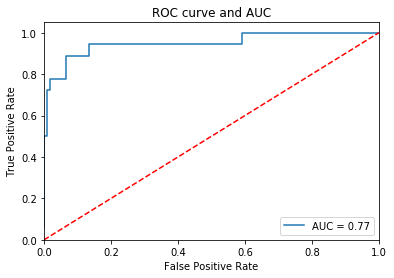

[[-0.41349966 -0.42992182  0.33662812 -0.92185539  0.88522457 -0.68553069
  -1.04748672 -0.3686197 ]]
             precision    recall  f1-score   support

        0.0       0.94      0.99      0.96       120
        1.0       0.91      0.56      0.69        18

avg / total       0.93      0.93      0.93       138

[[119   1]
 [  8  10]]


In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#d iv shows the result of coefficient, confusion metrics under train and ROC curve
logit_roc_auc = roc_auc_score(y_train, myreg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, myreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_train')
plt.show()
print(myreg.coef_)
fpr = SelectFpr(alpha = 0.05)
fpr = fpr.fit(X_train, y_train)
# print(fpr.pvalues_)

# confusion_matrix = confusion_matrix(y_train,y_predtrain)
print(classification_report(y_train,myreg.predict(X_train)))
newmatrix = confusion_matrix(y_train,y_predtrain)
print(newmatrix)

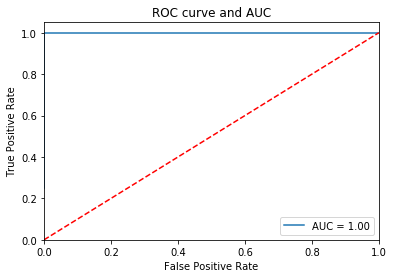

[[-0.41349966 -0.42992182  0.33662812 -0.92185539  0.88522457 -0.68553069
  -1.04748672 -0.3686197 ]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        30
        1.0       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        38

[[30  0]
 [ 0  8]]


In [49]:
logit_roc_auc = roc_auc_score(y_test, myreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, myreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_test')
plt.show()
print(myreg.coef_)
mymatrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
print(mymatrix)

In [50]:
#Compare with the accuracy in K fold
kfold = model_selection.KFold(n_splits = 5, random_state = 33)
mymodel = LogisticRegression()
scoring = "accuracy"
results = model_selection.cross_val_score(mymodel, X_train, y_train, cv = kfold, scoring = scoring)
print("result:", results.mean())

result: 0.927513227513


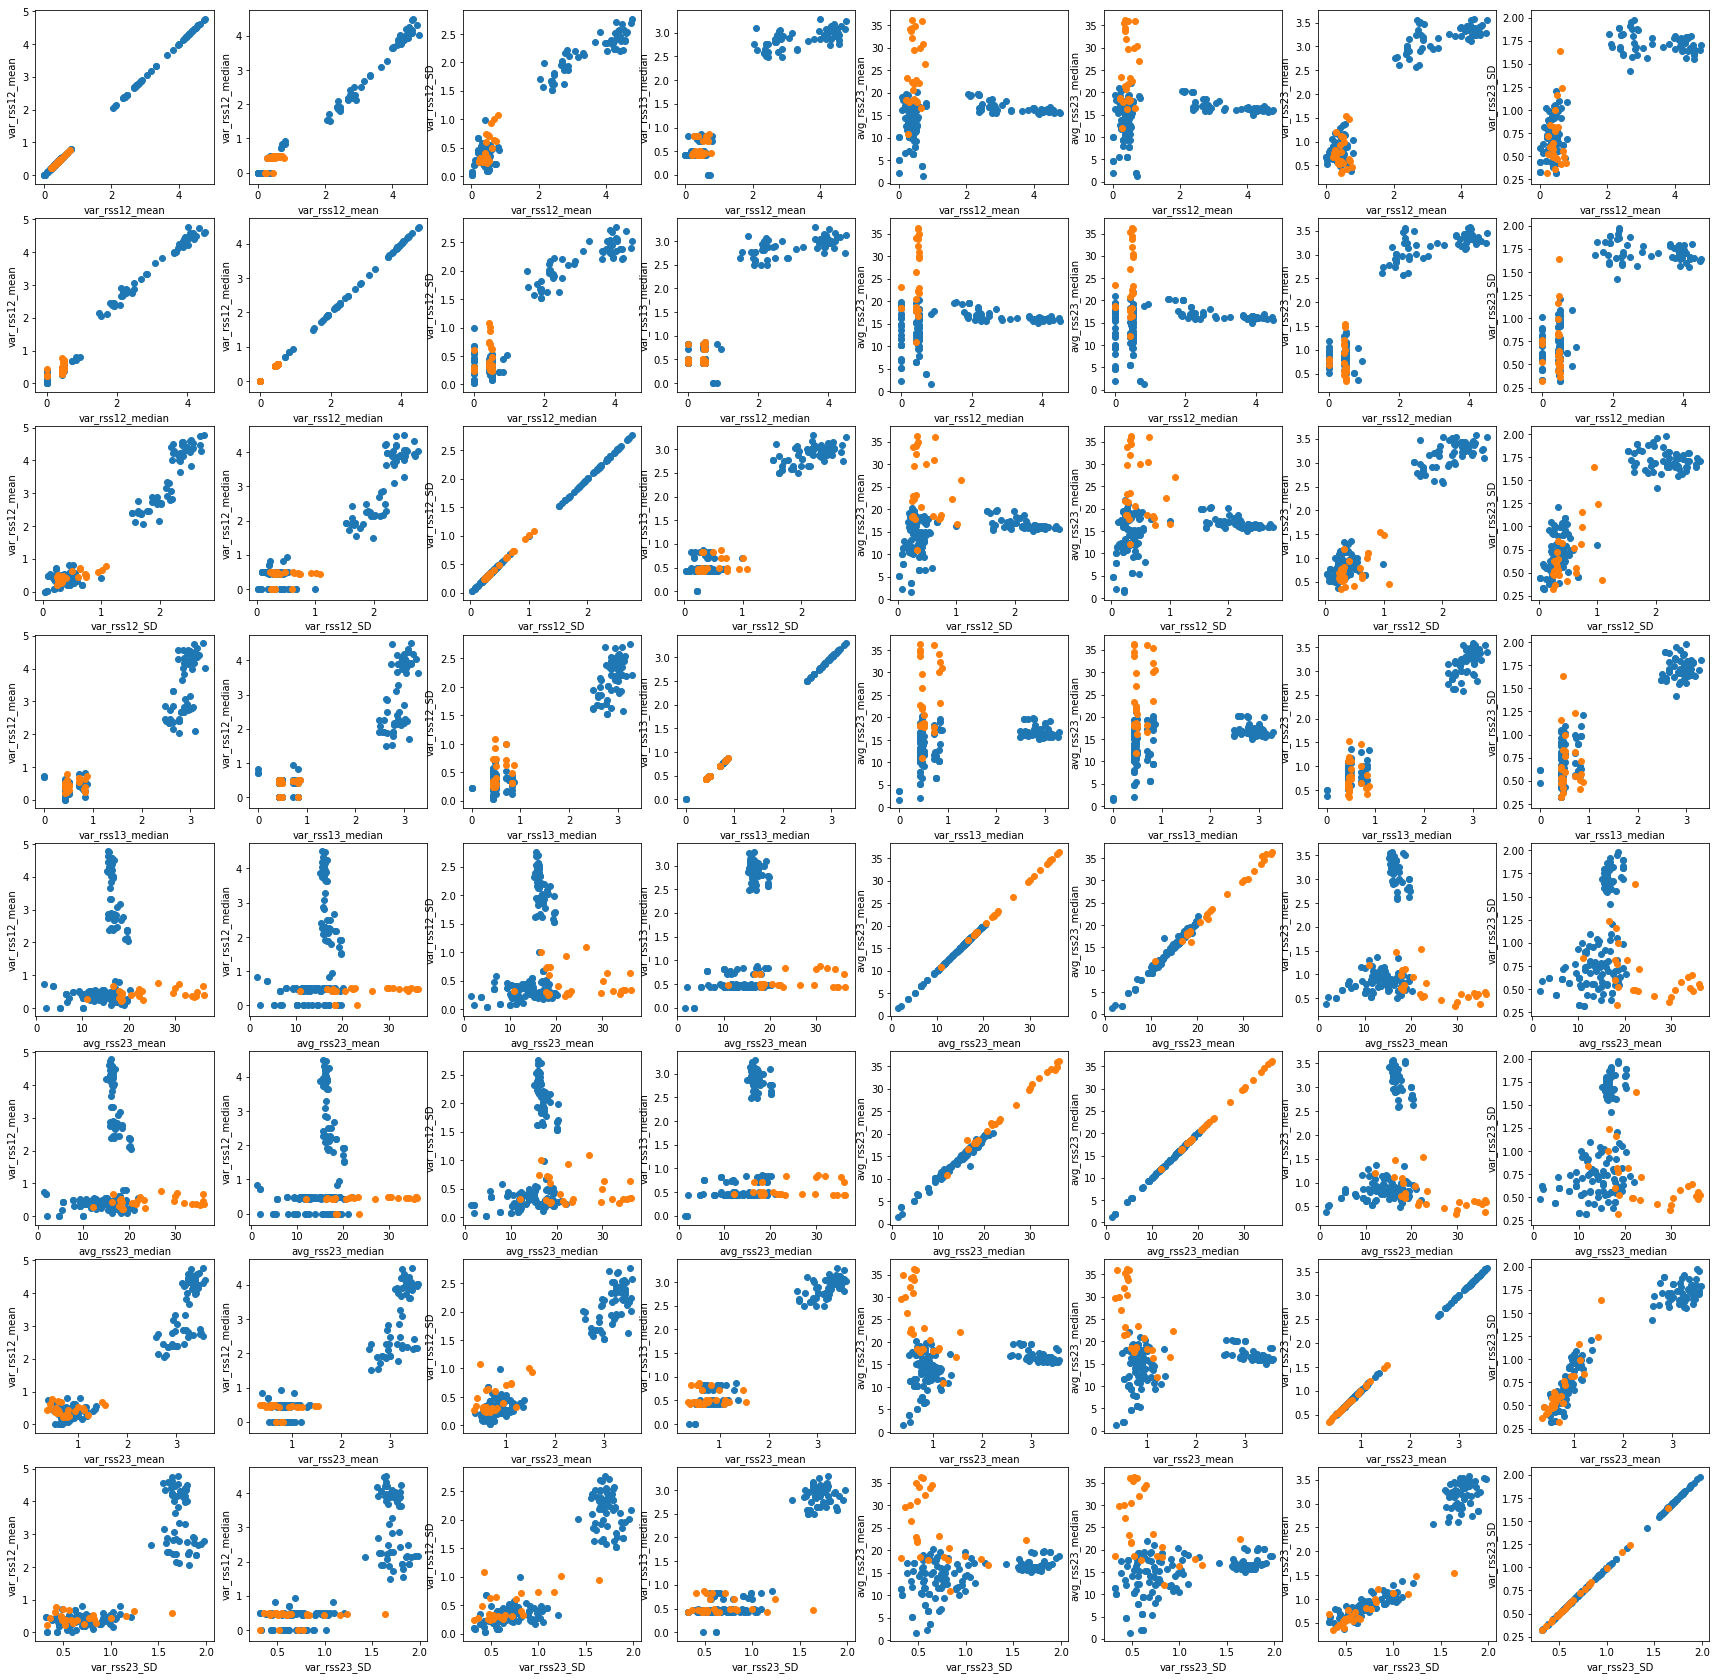

In [54]:
#1d_vi well-separated
def generatebend(p):
    l = []
    for val in Columnset[1:]:
        l.append(val+"_mean")
        l.append(val+"_median")
        l.append(val+"_SD")
    l.append("bend")
    X = pd.DataFrame(columns = l)
    for a in filelist[:1]:
        for f in range(1,8):
            filestr = a+str(f)+".csv"
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, p)
            for b in mylist:
                m = []
                for val in Columnset[1:]:
                    m.append(b[val].mean())
                    m.append(b[val].median())
                    m.append(b[val].std())
                m.append(1.0)
                tmp = pd.DataFrame([m],columns=l)
                X=X.append(tmp)
        
    for a in filelist[1:2]:
        for f in range(1,7):
            filestr = a+str(f)+".csv"
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, p)
            for b in mylist:
                m = []
                for val in Columnset[1:]:
                    m.append(b[val].mean())
                    m.append(b[val].median())
                    m.append(b[val].std())
                m.append(1.0)
                tmp = pd.DataFrame([m],columns=l)
                X=X.append(tmp)   
    return X

def generateother(p):
    l = []
    for val in Columnset[1:]:
        l.append(val+"_mean")
        l.append(val+"_median")
        l.append(val+"_SD")
    l.append("bend")
    X = pd.DataFrame(columns = l)

    for a in filelist[2:]:
        for f in range(1,16):
            filestr = a+str(f)+".csv"
#             print(filestr)
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, p)
            for b in mylist:
                m = []
                for val in Columnset[1:]:
                    m.append(b[val].mean())
                    m.append(b[val].median())
                    m.append(b[val].std())
                m.append(0.0)
                tmp = pd.DataFrame([m],columns=l)
                X=X.append(tmp)
    return X
bd = generatebend(2)
od = generateother(2)
bd = bd[data_columns]
od = od[data_columns]
cnt =0
plt.figure(figsize =(30,30))
for val1 in bd.columns:
    for val2 in od.columns:
        plt.subplot(8,8,cnt+1)
        plt.scatter(od[val1], od[val2])
        plt.scatter(bd[val1], bd[val2])
        plt.xlabel(val1)
        plt.ylabel(val2)
        cnt+=1
plt.savefig("separated.png")
plt.show()
        

In [166]:
#L1 regression 1_ei
# newreg = LogisticRegression(penalty = "l1")
# newreg.fit(X_train, y_train)
weightlist = [1]
for v in range(1,11):
    weightlist.append(5*v)
weightlist.append(0.5)
for u in range(1,11):
    weightlist.append(1/(u*10))
# weightlist
for m in range(0,1):

    tmp =[]
    for p in range(1,11):
        train_data = generatetrain(p)
        test_data = generatetest(p)
        test_data = shuffle(test_data)
        train_data = shuffle(train_data)
        X_train = train_data.iloc[:,:18]
        X_test = test_data.iloc[:,:18]
        y_train = train_data["bend"]
#     print(y_train.head())
        y_test = test_data["bend"]
        for val in weightlist:
            kfold = model_selection.KFold(n_splits = 5, random_state = 33)
            newmodel = LogisticRegression(penalty = "l1", C = val)
            scoring = "accuracy"
            results = model_selection.cross_val_score(newmodel, X_train, y_train, cv = kfold, scoring = scoring)
            tmp.append(results.mean())
            print("l=",p, "C = ",val, "accuracy=", results.mean())


l= 1 C =  1 accuracy= 0.941758241758
l= 1 C =  5 accuracy= 0.941758241758
l= 1 C =  10 accuracy= 0.941758241758
l= 1 C =  15 accuracy= 0.941758241758
l= 1 C =  20 accuracy= 0.941758241758
l= 1 C =  25 accuracy= 0.941758241758
l= 1 C =  30 accuracy= 0.941758241758
l= 1 C =  35 accuracy= 0.941758241758
l= 1 C =  40 accuracy= 0.941758241758
l= 1 C =  45 accuracy= 0.941758241758
l= 1 C =  50 accuracy= 0.941758241758
l= 1 C =  0.5 accuracy= 0.941758241758
l= 1 C =  0.1 accuracy= 0.897802197802
l= 1 C =  0.05 accuracy= 0.868131868132
l= 1 C =  0.03333333333333333 accuracy= 0.868131868132
l= 1 C =  0.025 accuracy= 0.868131868132
l= 1 C =  0.02 accuracy= 0.868131868132
l= 1 C =  0.016666666666666666 accuracy= 0.868131868132
l= 1 C =  0.014285714285714285 accuracy= 0.868131868132
l= 1 C =  0.0125 accuracy= 0.868131868132
l= 1 C =  0.011111111111111112 accuracy= 0.868131868132
l= 1 C =  0.01 accuracy= 0.868131868132
l= 2 C =  1 accuracy= 0.956878306878
l= 2 C =  5 accuracy= 0.956878306878
l= 2 C

l= 10 C =  1 accuracy= 0.946376811594
l= 10 C =  5 accuracy= 0.944927536232
l= 10 C =  10 accuracy= 0.944927536232
l= 10 C =  15 accuracy= 0.944927536232
l= 10 C =  20 accuracy= 0.946376811594
l= 10 C =  25 accuracy= 0.944927536232
l= 10 C =  30 accuracy= 0.944927536232
l= 10 C =  35 accuracy= 0.944927536232
l= 10 C =  40 accuracy= 0.944927536232
l= 10 C =  45 accuracy= 0.944927536232
l= 10 C =  50 accuracy= 0.944927536232
l= 10 C =  0.5 accuracy= 0.942028985507
l= 10 C =  0.1 accuracy= 0.946376811594
l= 10 C =  0.05 accuracy= 0.942028985507
l= 10 C =  0.03333333333333333 accuracy= 0.936231884058
l= 10 C =  0.025 accuracy= 0.934782608696
l= 10 C =  0.02 accuracy= 0.933333333333
l= 10 C =  0.016666666666666666 accuracy= 0.930434782609
l= 10 C =  0.014285714285714285 accuracy= 0.928985507246
l= 10 C =  0.0125 accuracy= 0.923188405797
l= 10 C =  0.011111111111111112 accuracy= 0.921739130435
l= 10 C =  0.01 accuracy= 0.91884057971


In [167]:
import math
print("the max accuracy is", max(tmp))
num =tmp.index(max(tmp))
print("The index is", num)
print("The best l is", math.ceil(num/21) )
print("The best C is", weightlist[num%21])

the max accuracy is 0.956878306878
The index is 22
The best l is 2
The best C is 5


In [126]:
#we determined the best local L and c, use it for feature selection
train_data = generatetrain(2)
test_data = generatetest(2)
test_data = shuffle(test_data)
train_data = shuffle(train_data)
X_train = train_data.iloc[:,:18]
X_test = test_data.iloc[:,:18]
y_train = train_data["bend"]
y_test = test_data["bend"]
myreg = LogisticRegression(penalty = "l1", C=5)
myreg =myreg.fit(X_train, y_train)
y_pred= myreg.predict(X_test)
y_predtrain = myreg.predict(X_train)

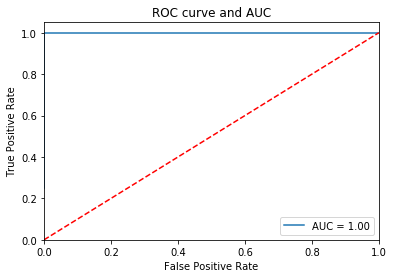

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        30
        1.0       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        38

[[30  0]
 [ 0  8]]


In [127]:
logit_roc_auc = roc_auc_score(y_test, myreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, myreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_test')
plt.show()
mymatrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
print(mymatrix)

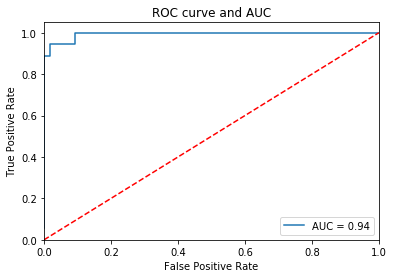

Confusion Metris:
             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99       120
        1.0       0.94      0.89      0.91        18

avg / total       0.98      0.98      0.98       138

[[119   1]
 [  2  16]]


In [129]:
logit_roc_auc = roc_auc_score(y_train, myreg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, myreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_train')
plt.show()

print("Confusion Metris:")


# confusion_matrix = confusion_matrix(y_train,y_predtrain)
print(classification_report(y_train,myreg.predict(X_train)))
newmatrix = confusion_matrix(y_train,y_predtrain)
print(newmatrix)

In [147]:
#1f multi-class Classification
def generatetrainmult(p):
    l = []
    for val in Columnset[1:]:
        l.append(val+"_mean")
        l.append(val+"_median")
        l.append(val+"_SD")
    l.append("type")
    X = pd.DataFrame(columns = l)
    for a in filelist[:1]:
        for f in range(3,8):
            filestr = a+str(f)+".csv"
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, p)
            for b in mylist:
                m = []
                for val in Columnset[1:]:
                    m.append(b[val].mean())
                    m.append(b[val].median())
                    m.append(b[val].std())
                m.append(1.0)
                tmp = pd.DataFrame([m],columns=l)
                X=X.append(tmp)
        
    for a in filelist[1:2]:
        for f in range(3,7):
            filestr = a+str(f)+".csv"
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, p)
            for b in mylist:
                m = []
                for val in Columnset[1:]:
                    m.append(b[val].mean())
                    m.append(b[val].median())
                    m.append(b[val].std())
                m.append(1.0)
                tmp = pd.DataFrame([m],columns=l)
                X=X.append(tmp)   
    for a in filelist[2:]:
        for f in range(4,16):
            filestr = a+str(f)+".csv"
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, p)
            for b in mylist:
                m = []
                for val in Columnset[1:]:
                    m.append(b[val].mean())
                    m.append(b[val].median())
                    m.append(b[val].std())
                if re.search("cycling", a):   
                    m.append(2.0)
                elif re.search("sitting", a):
                    m.append(4.0)
                elif re.search("lying", a):
                    m.append(3.0)
                elif re.search("standing", a):
                    m.append(5.0)
                else:
                    m.append(6.0)
                tmp = pd.DataFrame([m],columns=l)
                X=X.append(tmp)
#                 X["bend"]=0
    return X

def generatetestmult(p):
    l = []
    for val in Columnset[1:]:
        l.append(val+"_mean")
        l.append(val+"_median")
        l.append(val+"_SD")
    l.append("type")
    X = pd.DataFrame(columns = l)
    for a in filelist[:1]:
        for f in range(1,3):
            filestr = a+str(f)+".csv"
#             print(filestr)
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, p)
            for b in mylist:
                m = []
                for val in Columnset[1:]:
                    m.append(b[val].mean())
                    m.append(b[val].median())
                    m.append(b[val].std())
                m.append(1.0)
                tmp = pd.DataFrame([m],columns=l)
                X=X.append(tmp)
    for a in filelist[:1]:
        for f in range(1,3):
            filestr = a+str(f)+".csv"
#             print(filestr)
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, p)
            for b in mylist:
                m = []
                for val in Columnset[1:]:
                    m.append(b[val].mean())
                    m.append(b[val].median())
                    m.append(b[val].std())
                m.append(1.0)
                tmp = pd.DataFrame([m],columns=l)
                X=X.append(tmp)
    for a in filelist[2:]:
        for f in range(1,4):
            filestr = a+str(f)+".csv"
#             print(filestr)
            datatmp = pd.read_csv(filestr, header = 4)
            mylist = np.array_split(datatmp, p)
            for b in mylist:
                m = []
                for val in Columnset[1:]:
                    m.append(b[val].mean())
                    m.append(b[val].median())
                    m.append(b[val].std())
                if re.search("cycling", a):   
                    m.append(2.0)
                elif re.search("sitting", a):
                    m.append(4.0)
                elif re.search("lying", a):
                    m.append(3.0)
                elif re.search("standing", a):
                    m.append(5.0)
                else:
                    m.append(6.0)
                tmp = pd.DataFrame([m],columns=l)
                X=X.append(tmp)
    return X

In [155]:
train_data = generatetrainmult(2)
test_data = generatetestmult(2)
test_data = shuffle(test_data)
train_data = shuffle(train_data)
X_train = train_data.iloc[:,:18]
X_test = test_data.iloc[:,:18]
y_train = train_data["type"]
y_test = test_data["type"]

In [156]:
# X_train = X_train[data_columns]
# X_test = X_test[data_columns]
# len(y_test)
myreg = LogisticRegression(penalty = "l1", C=5)
myreg =myreg.fit(X_train, y_train)
y_pred= myreg.predict(X_test)
y_predtrain = myreg.predict(X_train)

In [157]:
mymatrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
print(mymatrix)

             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00         8
        2.0       1.00      1.00      1.00         6
        3.0       1.00      1.00      1.00         6
        4.0       0.80      0.67      0.73         6
        5.0       0.71      0.83      0.77         6
        6.0       1.00      1.00      1.00         6

avg / total       0.92      0.92      0.92        38

[[8 0 0 0 0 0]
 [0 6 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 4 2 0]
 [0 0 0 1 5 0]
 [0 0 0 0 0 6]]


In [151]:
from sklearn.preprocessing import label_binarize
yscore = myreg.decision_function(X_test)

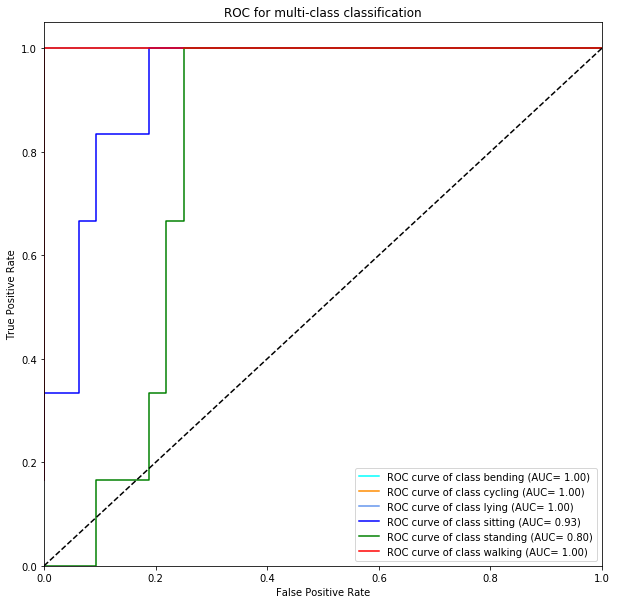

In [152]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
plt.figure(figsize = (10,10))
fpr = dict()
tpr = dict()
roc_auc = dict()

# y_l = label_binarize(y_test, classes = ["bending", "cycling", "lying", "sitting","standing", "walking"])
classes = ["bending", "cycling", "lying", "sitting","standing", "walking"]
for i in range(1,7):
    fpr[i], tpr[i], _ = roc_curve(y_test, yscore[:, i-1], pos_label = i)
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['aqua', 'darkorange', 'cornflowerblue',"blue","green","red"])
for i, color in zip(range(1,7), colors):
    plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0} (AUC= {1:0.2f})'
             ''.format(classes[i-1], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class classification')
plt.legend(loc="lower right")
plt.savefig("f_ROC.png")
plt.show()

In [158]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
#1_f using naive bayes classifier
gc = GaussianNB()
gc = gc.fit(X_train, y_train)
y_gpred = gc.predict(X_test)
mymatrix = confusion_matrix(y_test,y_gpred)
print(classification_report(y_test, y_gpred))
print(mymatrix)

             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00         8
        2.0       1.00      1.00      1.00         6
        3.0       1.00      1.00      1.00         6
        4.0       0.71      0.83      0.77         6
        5.0       0.80      0.67      0.73         6
        6.0       1.00      1.00      1.00         6

avg / total       0.92      0.92      0.92        38

[[8 0 0 0 0 0]
 [0 6 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 5 1 0]
 [0 0 0 2 4 0]
 [0 0 0 0 0 6]]


In [159]:
gm = MultinomialNB()
gm = gc.fit(X_train, y_train)
y_mpred = gc.predict(X_test)
mymatrix = confusion_matrix(y_test,y_mpred)
print(classification_report(y_test, y_mpred))
print(mymatrix)

             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00         8
        2.0       1.00      1.00      1.00         6
        3.0       1.00      1.00      1.00         6
        4.0       0.71      0.83      0.77         6
        5.0       0.80      0.67      0.73         6
        6.0       1.00      1.00      1.00         6

avg / total       0.92      0.92      0.92        38

[[8 0 0 0 0 0]
 [0 6 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 5 1 0]
 [0 0 0 2 4 0]
 [0 0 0 0 0 6]]
